In [109]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")

In [110]:
rcParams["figure.figsize"] = 15, 5



data = pd.read_excel("Exc.xlsx", index_col=0)
data.index.freq = "Q"




In [111]:
#Werbeumsätze von Google in den Jahren 2001 bis 2020 (in Milliarden US-Dollar)
data

,Umsatz
Time,
2007-09-30,5
2007-12-31,118
2008-03-31,241
2008-06-30,378
2008-09-30,419
2008-12-31,806
2009-03-31,2940
2009-06-30,2427
2009-09-30,3060


In [112]:
#save for the paper
data.to_html("table")

### Convert the data


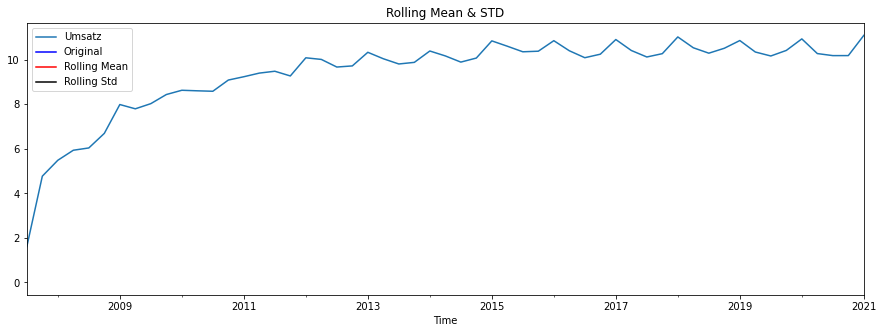

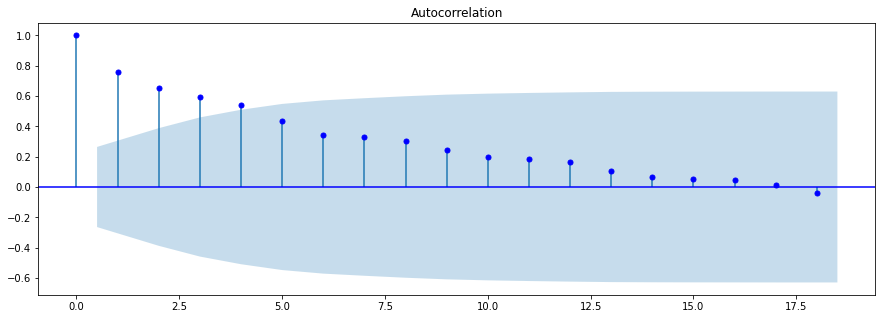

Results of Dickey-Fuller Test:
Test Statistics                -3.836469
p-value                         0.002555
#Lags Used                     11.000000
Numbers of Observation Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [188]:
# Since the data has a trend - Difference and Square Root
data_log = np.log(data)

data_log.plot()
test_stationarity(data_log)

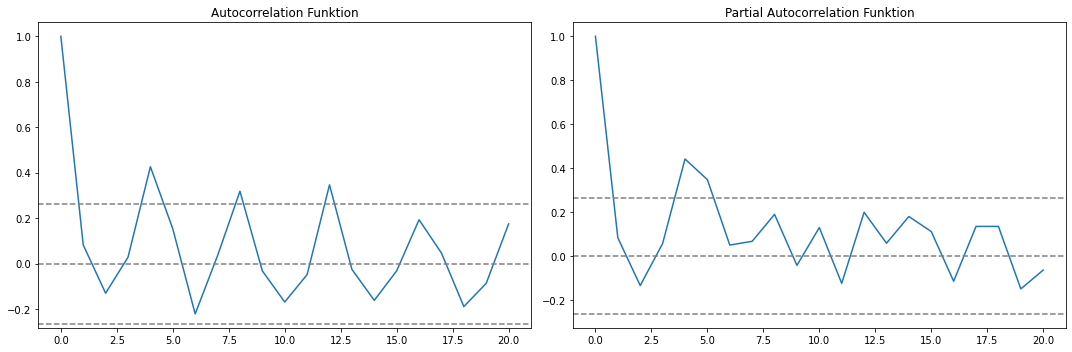

In [149]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShift, nlags=20)
lag_pacf = pacf(dataLogDiffShift, nlags=20, method="ols")

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.title("Autocorrelation Funktion")

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0, linestyle = "--", color="gray")
plt.axhline(y = -1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.axhline(y = 1.96/np.sqrt(len(data_diff)), linestyle="--", color="gray")
plt.title("Partial Autocorrelation Funktion")
plt.tight_layout()

# Building Models

Plotting AR model


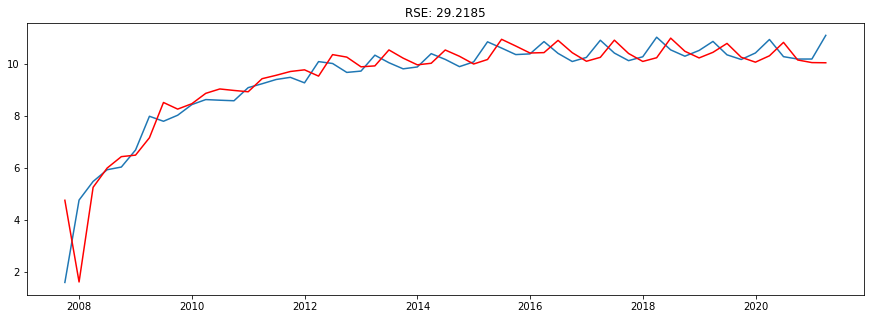

In [192]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(data_log, order=(2, 0, 1))
results_AR = model.fit(disp= -1)
plt.plot(data_log)
plt.plot(results_AR.fittedvalues, color="red")
plt.title("RSE: %.4f" % sum((results_AR.fittedvalues-data_log["Umsatz"])**2))
print("Plotting AR model")

In [75]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# model = pm.auto_arima(model_0, start_p=0, start_q=0,
#                       test='adf',       # use adftest to find optimal 'd'
#                       max_p=7, max_q=7,
#                       m = 1, # maximum p and q
#                                   # frequency of series
#                       d=None,           # let model determine 'd'
#                       seasonal=False,   # No Seasonality
#                       start_P=0, 
#                       D=0, 
#                       trace=True,
#                       error_action='ignore',  
#                       suppress_warnings=True, 
#                       stepwise=True)
arima_model = pm.auto_arima(data_diff ,start_p=0, d=1, start_q=0,  
                            information_criterion = "bic",
                         max_p=5, max_d=5, max_q=5, start_P=0, 
                         D=0, start_Q=0, max_P=5, max_D=5, 
                         max_Q=5, m=4, seasonal=True, 
                         error_action="warn", trace = True, supress_warnings=True,
                        stepwise = True, random_state=20, n_fits = 50)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[4] intercept   : BIC=103.370, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : BIC=81.494, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[4]             : BIC=104.035, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : BIC=106.614, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[4] intercept   : BIC=84.066, Time=0.55 sec
 ARIMA(1,1,0)(1,0,1)[4] intercept   : BIC=81.190, Time=0.62 sec
 ARIMA(1,1,0)(0,0,1)[4] intercept   : BIC=inf, Time=1.06 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept   : BIC=inf, Time=2.28 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : BIC=83.245, Time=1.18 sec
 ARIMA(1,1,0)(0,0,2)[4] intercept   : BIC=inf, Time=1.68 sec
 ARIMA(1,1,0)(2,0,2)[4] intercept   : BIC=inf, Time=2.20 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : BIC=85.857, Time=0.59 sec
 ARIMA(2,1,0)(1,0,1)[4] intercept   : BIC=84.936, Time=1.04 sec
 ARIMA(1,1,1)(1,0,1)[4] intercept   : BIC=85.038, Time=1.28 sec
 ARIMA(0,

Plotting MA model


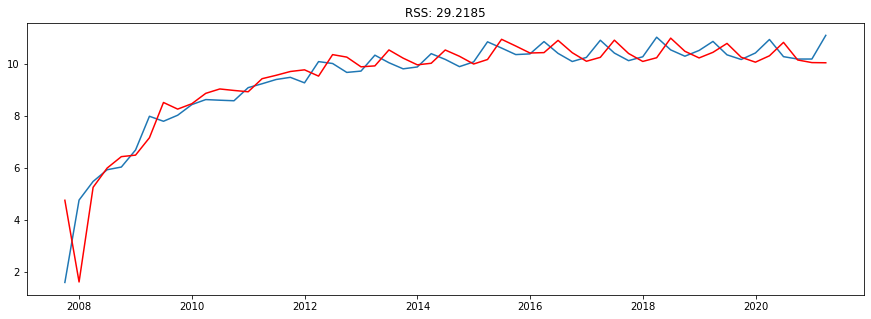

In [203]:
#MA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = ARIMA(data_log, order=(2, 0, 1))
results_MA = model.fit(disp=-1)
plt.plot(data_log)
plt.plot(results_MA.fittedvalues, color="red")
plt.title("RSS: %.4f" % sum((results_MA.fittedvalues-data_log["Umsatz"])**2))
print("Plotting MA model") 

Plotting ARIMA model


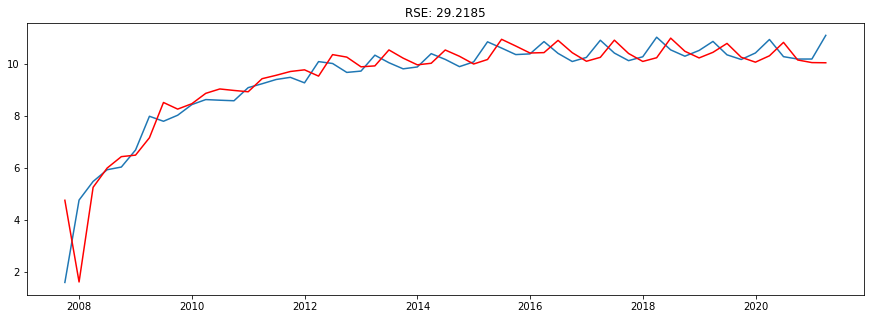

In [204]:
#ARIMA
model = ARIMA(data_log, order=(2, 0, 1))
results_ARIMA = model.fit(disp= -1)
plt.plot(data_log)
plt.plot(results_ARIMA.fittedvalues, color="red")
plt.title("RSE: %.4f" % sum((results_ARIMA.fittedvalues-data_log["Umsatz"])**2))
print("Plotting ARIMA model")

In [205]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff.head()



Time
2007-09-30    4.762819
2007-12-31    1.628008
2008-03-31    5.259685
2008-06-30    5.999086
2008-09-30    6.437223
Freq: Q-DEC, dtype: float64

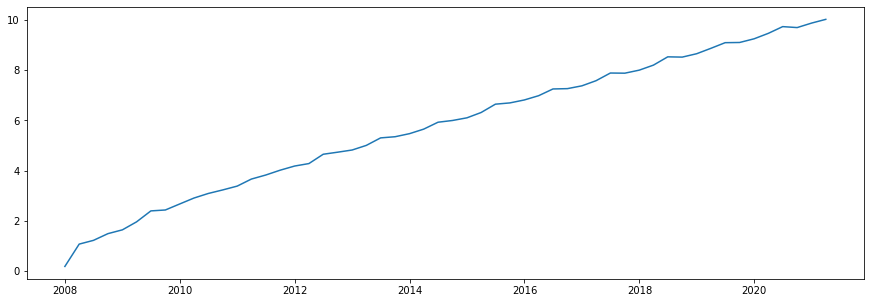

In [183]:
#Converted to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_cumsum.head()
plt.plot(predictions_ARIMA_cumsum)


In [184]:
predictions_ARIMA_log = pd.Series(data_log["Umsatz"].iloc[0],index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)
predictions_ARIMA_log.head()


Time
2007-09-30    1.609438
2007-12-31    1.801703
2008-03-31    2.689876
2008-06-30    2.838971
2008-09-30    3.106143
Freq: Q-DEC, dtype: float64

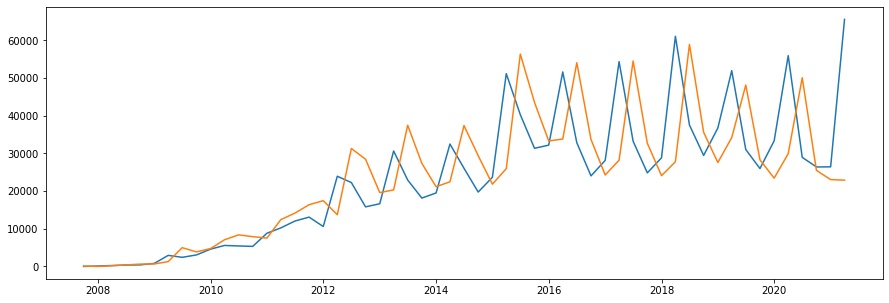

In [206]:
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
plt.plot(data)
plt.plot(predictions_ARIMA)

Time
2007-09-30         5.000000
2007-12-31         6.059959
2008-03-31        14.729847
2008-06-30        17.098157
2008-09-30        22.334739
2008-12-31        25.985485
2009-03-31        35.693275
2009-06-30        55.165203
2009-09-30        57.196732
2009-12-31        72.780526
2010-03-31        91.976183
2010-06-30       110.298280
2010-09-30       127.005307
2010-12-31       147.859147
2011-03-31       195.570989
2011-06-30       229.442704
2011-09-30       278.316722
2011-12-31       328.235077
2012-03-31       362.229348
2012-06-30       524.692998
2012-09-30       569.529386
2012-12-31       621.100798
2013-03-31       746.070166
2013-06-30      1005.763061
2013-09-30      1052.978906
2013-12-31      1190.129601
2014-03-31      1424.443664
2014-06-30      1874.460811
2014-09-30      2008.388050
2014-12-31      2233.081924
2015-03-31      2757.678339
2015-06-30      3842.049202
2015-09-30      4039.477862
2015-12-31      4543.282188
2016-03-31      5382.992643
2016-06-30     

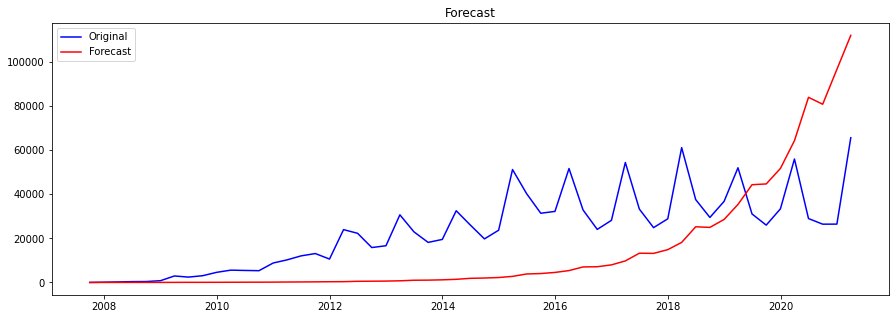

In [186]:

orig = plt.plot(data, color="blue", label = "Original")
forecast = plt.plot(predictions_ARIMA, color="red", label = "Forecast")
plt.legend(loc="best")
plt.title("Forecast")
predictions_ARIMA

In [105]:
predictions_ARIMA

Time
2007-09-30    3.161247
2007-12-31    3.161247
2008-03-31    4.125477
2008-06-30    5.061913
2008-09-30    4.189275
2008-12-31    4.213609
2009-03-31    3.978459
2009-06-30    3.958322
2009-09-30    4.611289
2009-12-31    4.008377
2010-03-31    4.069204
2010-06-30    4.175894
2010-09-30    4.175360
2010-12-31    4.114691
2011-03-31    3.984809
2011-06-30    4.215706
2011-09-30    4.111845
2011-12-31    4.137284
2012-03-31    4.198277
2012-06-30    3.876169
2012-09-30    4.386407
2012-12-31    4.190925
2013-03-31    4.015698
2013-06-30    3.976428
2013-09-30    4.390925
2013-12-31    4.101036
2014-03-31    4.036701
2014-06-30    4.004878
2014-09-30    4.333663
2014-12-31    4.131003
2015-03-31    4.000029
2015-06-30    3.969704
2015-09-30    4.429618
2015-12-31    4.118501
2016-03-31    4.044153
2016-06-30    4.003151
2016-09-30    4.399163
2016-12-31    4.078778
2017-03-31    3.997372
2017-06-30    3.990284
2017-09-30    4.480480
2017-12-31    4.063237
2018-03-31    4.004311
2018-0

### Forecast Away


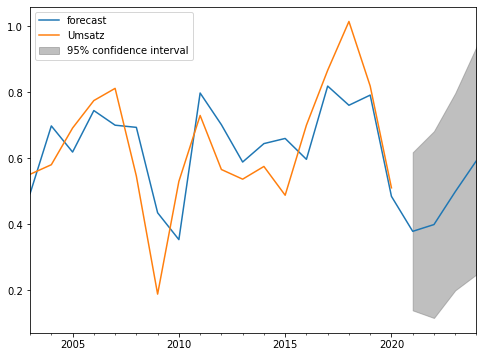

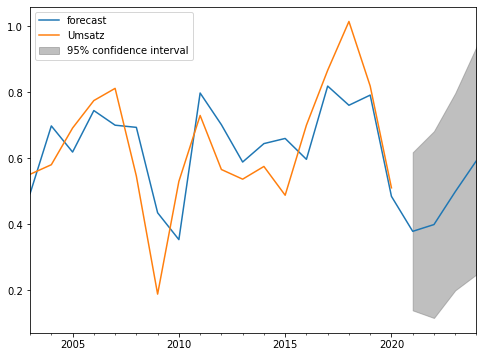

In [24]:
results_ARIMA.plot_predict(1,22)
#results_ARIMA.forecast(steps=2)

In [25]:
forecast = results_ARIMA.forecast(steps=3)[0]
forecast

array([0.37817133, 0.39871069, 0.49831037])

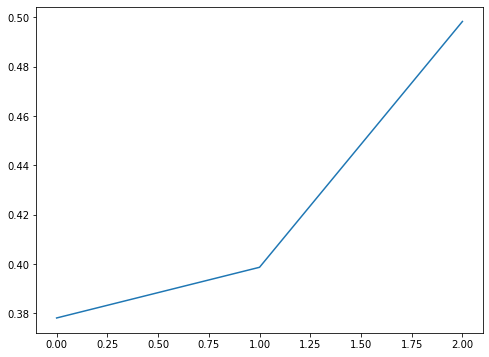

In [26]:
plt.plot(forecast)

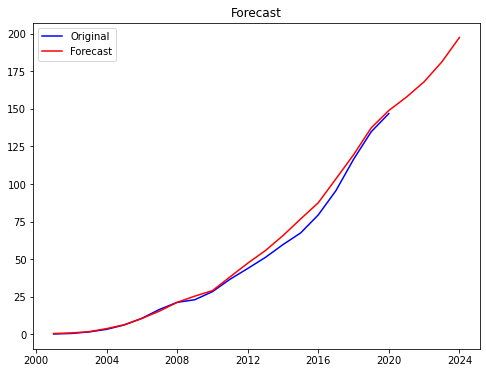

In [27]:
def ConverterDFs(series2, n):
    series = pd.date_range('2021-01-01', periods=n, freq="AS")
    series = pd.DataFrame(series, columns= ["Jahr"])
    predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
    forecast = results_ARIMA.forecast(steps=n)[0]
    forecast1 = pd.DataFrame(forecast, columns=['Umsatz'])
    df = pd.concat([series, forecast1], axis=1)
    df = df.set_index(df["Jahr"])
    df = df.drop(columns = ["Jahr"])
    my_series = df.squeeze()
    predictions_ARIMA
    total = predictions_ARIMA.add(my_series, fill_value=0)   

    total_cumsum = np.square(total.cumsum())
    total = pd.Series(data_diff["Umsatz"].iloc[0],index=data.index)
    total = total.add(total_cumsum,fill_value=0)

    orig = plt.plot(data, color="blue", label = "Original")
    forecast1 = plt.plot(total, color="red", label = "Forecast")
    plt.legend(loc="best")
    plt.title("Forecast")
    plt.show(block=False)
    

x = ConverterDFs(forecast, 4)

### Finding AIC 

In [33]:
X = data_diff.values
train = X[:45] # 15 data as train data
test = X[45:]  # 5 data as test data
predictions = []


In [425]:
model_arima = ARIMA(train,order=(2, 0, 0))
model_arima_fit = model_arima.fit()



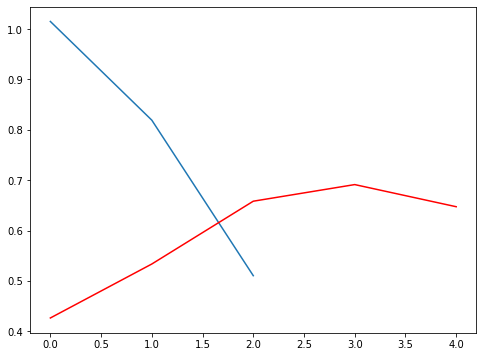

In [426]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
#another method
import itertools
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue